In [1]:
#imoport some packages to use 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

#To see our directory 
import os 
import random 
import gc #Gabage collector for cleanning data from memory 
from skimage import io, data_dir
from tensorflow.keras import callbacks

In [2]:
train_dir = 'bathroom/train'
train_imgs = ['bathroom/train/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'bathroom/test'
test_imgs = ['bathroom/test/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)

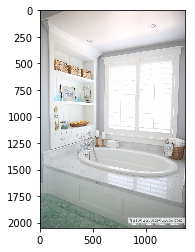

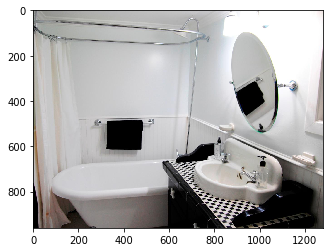

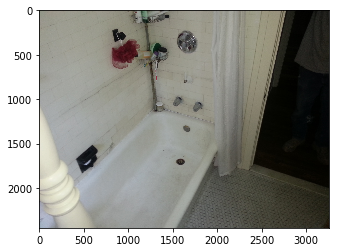

In [3]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import Dense
import pandas as pd

from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.utils import to_categorical
#tf.compat.v2.keras.utils.to_categorical
#tf.keras.utils.to_categorical
#import tensorflow.compat.v2.keras.utils.to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD


from sklearn.metrics import log_loss


Using TensorFlow backend.


In [3]:
from tensorflow.keras.layers import Input, Dense, Convolution2D, MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D, ZeroPadding2D, Dropout, Flatten, Reshape
from tensorflow.keras.layers import  Activation
from keras.layers import  merge


In [14]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(817, 224, 224, 3)
<class 'numpy.ndarray'>
(120, 224, 224, 3)


In [4]:
# A function to read and process the images to an acceptable format for our model 
def read_and_process_images(list_of_images):
    #Returns one array
   
    #y is an array of labels
   
    y = [] # labels
    for image in list_of_images:
       
    
        if 'new' in image:
            y.append(1)
        elif 'old' in image:
            y.append(0)
    return y

In [16]:
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)


# VGG16_MODEL2

In [17]:
from tensorflow.keras.models import Model

def vgg16_model(img_rows, img_cols, channel=3, num_classes=None):

    model = VGG16(weights='imagenet', include_top=True)

    model.layers.pop()

    model.outputs = [model.layers[-1].output]

    #model.layers[-1].outbound_nodes = []
    model.layers[-1].outbound_node = []

    x=Dense(num_classes, activation='softmax')(model.output)

    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

    for layer in model.layers[:8]:

       layer.trainable = False

# Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.1, random_state=42)
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 2
batch_size = 64
nb_epoch = 15


In [ ]:
model = vgg16_model(img_rows, img_cols, channel, num_classes)

model.summary()
# Start Fine-tuning
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=128,epochs=10,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])
# Make predictions
predictions_valid = model.predict(X_valid, batch_size=batch_size, verbose=1)

# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)

In [20]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)

[0.549149735768636, 0.8666667]


In [13]:
Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(0)
    else:
        Y_pred.append(1)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(0)
    else:
        Y_test.append(1)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)


<class 'list'>
(120,)
<class 'numpy.ndarray'>
[0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1
 1 0 0 0 1 0 1 0 0]
<class 'list'>
(120,)
<class 'numpy.ndarray'>
[0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 1 0 0]


0.8833333333333333

# Data Augumenation 1

In [22]:
train_dir = 'bathroom/trainpreview'
train_imgs = ['bathroom/trainpreview/{}'.format(i) for i in os.listdir(train_dir)]
random.shuffle(train_imgs)
length_train = len(train_imgs)


In [23]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)

<class 'numpy.ndarray'>
(3357, 224, 224, 3)


In [25]:
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)



In [26]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.1, random_state=42)
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 2
batch_size = 64
nb_epoch = 15

In [ ]:
model = vgg16_model(img_rows, img_cols, channel, num_classes)

model.summary()
# Start Fine-tuning
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=128,epochs=10,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])
# Make predictions
predictions_valid = model.predict(X_valid, batch_size=batch_size, verbose=1)

# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)


In [28]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)

[0.23377535939216615, 0.9583333]


# Data Augumentation 2

In [5]:
train_dir = 'bathroom/trainpreview1'
train_imgs = ['bathroom/trainpreview1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'bathroom/test'
test_imgs = ['bathroom/test/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test = len(test_imgs)

In [6]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)

test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(7443, 224, 224, 3)
<class 'numpy.ndarray'>
(120, 224, 224, 3)


In [7]:
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)

In [8]:
from tensorflow.keras.models import Model

def vgg16_model(img_rows, img_cols, channel=3, num_classes=None):

    model = VGG16(weights='imagenet', include_top=True)

    model.layers.pop()

    model.outputs = [model.layers[-1].output]

    #model.layers[-1].outbound_nodes = []
    model.layers[-1].outbound_node = []

    x=Dense(num_classes, activation='softmax')(model.output)

    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

    for layer in model.layers[:8]:

       layer.trainable = False

# Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.1, random_state=42)
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 2
batch_size = 64
nb_epoch = 20

In [ ]:
model = vgg16_model(img_rows, img_cols, channel, num_classes)

model.summary()
# Start Fine-tuning
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=128,epochs=10,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])
# Make predictions
predictions_valid = model.predict(X_valid, batch_size=batch_size, verbose=1)

# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)

In [11]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)

[0.10789891382058461, 0.98333335]


# Data Augementation 3

In [5]:
train_dir = 'bathroom/trainpreview2'
train_imgs = ['bathroom/trainpreview2/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'bathroom/test'
test_imgs = ['bathroom/test/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test = len(test_imgs)

In [6]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)

test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(14636, 224, 224, 3)
<class 'numpy.ndarray'>
(120, 224, 224, 3)


In [7]:
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)

In [8]:
from tensorflow.keras.models import Model

def vgg16_model(img_rows, img_cols, channel=3, num_classes=None):

    model = VGG16(weights='imagenet', include_top=True)

    model.layers.pop()

    model.outputs = [model.layers[-1].output]

    #model.layers[-1].outbound_nodes = []
    model.layers[-1].outbound_node = []

    x=Dense(num_classes, activation='softmax')(model.output)

    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

    for layer in model.layers[:8]:

       layer.trainable = False

# Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.1, random_state=42)
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 2
batch_size = 64
nb_epoch = 20

In [11]:

del train_img
del train_y

In [ ]:
model = vgg16_model(img_rows, img_cols, channel, num_classes)

model.summary()
# Start Fine-tuning
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=128,epochs=10,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])
# Make predictions
predictions_valid = model.predict(X_valid, batch_size=batch_size, verbose=1)

# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)

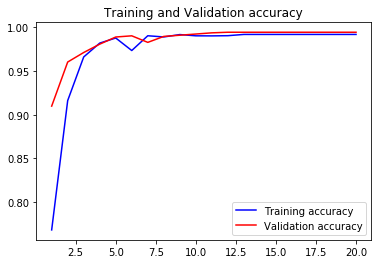

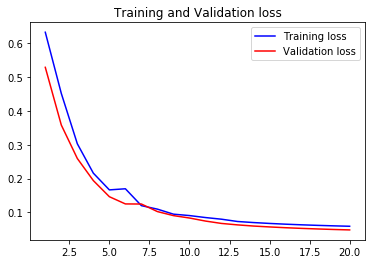

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [14]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)

[0.08629952954749266, 0.98333335]
